<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/01.%20Week%201/Automobile_Regresi_Linear_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 19.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Automobile.csv')

Saving Automobile.csv to Automobile.csv


Mean Squared Error (MSE): 0.587120678462545
Formula: MSE = (1/n) * Σ(y_true - y_pred)^2
MSE measures the average squared difference between actual and predicted values.

Root Mean Squared Error (RMSE): 0.7662380037968262
Formula: RMSE = sqrt(MSE)
RMSE represents the standard deviation of the prediction errors.

R-squared (R²): 0.599452167006681
Formula: R² = 1 - (Σ(y_true - y_pred)^2 / Σ(y_true - mean(y_true))^2)
R² measures how well the model explains variance in the target variable.


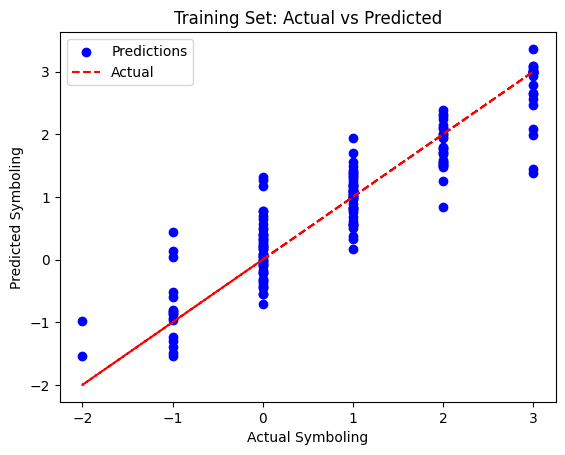

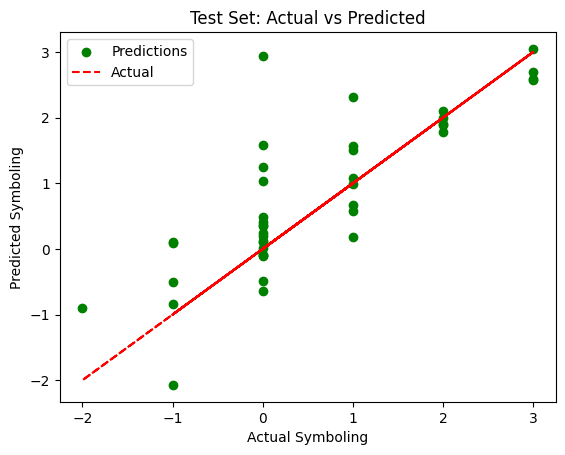

In [3]:
df.fillna(df.median(numeric_only=True), inplace=True)

# Select features and target variable
X = df.drop(columns=["symboling"])
y = df["symboling"]

# Convert categorical variables to numerical (if any)
X = pd.get_dummies(X, drop_first=True)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_test)

# Print evaluation results with formula explanations
print(f"Mean Squared Error (MSE): {mse}\nFormula: MSE = (1/n) * Σ(y_true - y_pred)^2\nMSE measures the average squared difference between actual and predicted values.\n")
print(f"Root Mean Squared Error (RMSE): {rmse}\nFormula: RMSE = sqrt(MSE)\nRMSE represents the standard deviation of the prediction errors.\n")
print(f"R-squared (R²): {r_squared}\nFormula: R² = 1 - (Σ(y_true - y_pred)^2 / Σ(y_true - mean(y_true))^2)\nR² measures how well the model explains variance in the target variable.")

# Visualising the Training set results
plt.scatter(y_train, y_pred_train, color='blue', label='Predictions')
plt.plot(y_train, y_train, color='red', linestyle='dashed', label='Actual')
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Training Set: Actual vs Predicted")
plt.legend()
plt.show()

# Visualising the Test set results
plt.scatter(y_test, y_pred_test, color='green', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Actual')
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Test Set: Actual vs Predicted")
plt.legend()
plt.show()